In [261]:
import re
import csv
import numpy as np
import pandas as pd
import requests
import urllib
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
sns.set(style='ticks',color_codes=True)
from sklearn import preprocessing
from matplotlib.pyplot import figure

In [262]:
df = pd.read_csv("dataset kaggle bus cleaned 2.csv")
df.shape

(328235, 26)

In [263]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'day', 'time',
       'hour of issue', 'datetime_text', 'Created_On', 'Boro',
       'Bus_Company_Name', 'bus company name normalized', 'How_Long_Delayed',
       'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Informed_On', 'Incident_Number', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [264]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,day,time,hour of issue,datetime_text,Created_On,Boro,Bus_Company_Name,bus company name normalized,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1212699,Special Ed AM Run,48186,N758,Other,75485,2015-09-02T06:27:00,2015-09-02,06:27:00,6,2015-09-02 06:27:00,2015-09-02T06:29:00,Nassau County,"BORO TRANSIT, INC.","BORO TRANSIT, INC.",25 minutes,0,Yes,No,No,2015-09-02T06:29:00,NaN,2015-09-02T06:29:16,Running Late,School-Age
1,2015-2016,1212700,Special Ed AM Run,2518,L530,Mechanical Problem,21854,2015-09-02T06:24:00,2015-09-02,06:24:00,6,2015-09-02 06:24:00,2015-09-02T06:30:00,Brooklyn,"RELIANT TRANS, INC. (B232","RELIANT TRANS, INC.",NaN,0,Yes,Yes,Yes,2015-09-02T06:30:00,NaN,2015-09-02T06:30:19,Breakdown,School-Age
2,2015-2016,1212701,Special Ed AM Run,235,K168,Other,18366,2015-09-02T06:45:00,2015-09-02,06:45:00,6,2015-09-02 06:45:00,2015-09-02T06:47:00,Brooklyn,"NEW DAWN TRANSIT, LLC (B2","NEW DAWN TRANSIT, LLC (B2",30MINS,0,Yes,Yes,No,2015-09-02T06:47:00,NaN,2015-09-02T08:05:39,Running Late,School-Age
3,2015-2016,1212703,Special Ed AM Run,2102,K216,Other,21501,2015-09-02T06:55:00,2015-09-02,06:55:00,6,2015-09-02 06:55:00,2015-09-02T07:02:00,Brooklyn,EMPIRE STATE BUS CORP.,EMPIRE STATE BUS CORP.,20 min,1,Yes,Yes,No,2015-09-02T07:02:00,NaN,2015-09-02T07:02:01,Running Late,School-Age
4,2015-2016,1212704,Special Ed AM Run,48162,N861,Mechanical Problem,75485,2015-09-02T06:55:00,2015-09-02,06:55:00,6,2015-09-02 06:55:00,2015-09-02T07:04:00,Nassau County,"BORO TRANSIT, INC.","BORO TRANSIT, INC.",30 min,0,Yes,Yes,No,2015-09-02T07:04:00,NaN,2015-09-02T07:04:25,Running Late,School-Age


In [265]:
df['Breakdown_or_Running_Late'].value_counts()

Running Late    293300
Breakdown        34935
Name: Breakdown_or_Running_Late, dtype: int64

In [266]:
df_runlate = df[df['Breakdown_or_Running_Late']=='Running Late']

In [270]:
df = df.drop('How_Long_Delayed',axis=1)

In [271]:
df.describe()

,Busbreakdown_ID,hour of issue,Number_Of_Students_On_The_Bus
count,3.282350e+05,328235.000000,328235.000000
mean,1.380236e+06,8.229915,3.316267
std,9.737868e+04,3.107067,66.306166
min,1.212681e+06,0.000000,0.000000
25%,1.295976e+06,6.000000,0.000000
50%,1.379091e+06,7.000000,0.000000
75%,1.466678e+06,8.000000,3.000000
max,1.548737e+06,23.000000,9052.000000


In [272]:
df.info()
#Incident_Number and Boro are low on numbers of rows - INCIDEN NUMBER NOT NECCESSARY 
#Convert school to day/time object 
#Look into reason 
#TARGET IS Breakdown_or_running_late

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 25 columns):
School_Year                        328235 non-null object
Busbreakdown_ID                    328235 non-null int64
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
Occurred_On                        328235 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
datetime_text                      328235 non-null object
Created_On                         328235 non-null object
Boro                               317077 non-null object
Bus_Company_Name                   328235 non-null object
bus company name norm

In [273]:
df.Incident_Number.dropna()
#INCIDENT NUMBER NOT SHOWING UP FOR EACH ROW. Not neccessary 
#There is only incident numbers for 9844 out of 328,235 

1102          2710956
1442          2737089
1509          2728990
1987          2725956
2177          2747045
2366          2783571
3254          2787061
3611          2784166
3779          2787899
4094          2710619
4660          2731470
4935          2741136
5935          2715862
6055          2786417
6392          2824627
6505          2830853
6508          2830824
6530          2830846
6536          2830847
6565          2830876
6595          2830881
6600          2830880
6671          2830917
6719          2830933
6732          2830980
6750          2831564
6752          2831557
6756          2831581
6787          2831812
6791          2831814
             ...     
321865     9.0828e+07
321915     9.0828e+07
322559     9.0829e+07
322627     9.0829e+07
322654    9.08290e+07
322700    9.08295e+07
322802    9.08296e+07
323098      9.083e+07
323202    9.08304e+07
323235    9.08305e+07
323327    9.08307e+07
323634    9.08312e+07
323644    9.08313e+07
323694    9.08318e+07
324411    

In [274]:
df = df.drop('Incident_Number', axis=1)
#REMOVED INCIDENT NUMBER FROM CSV FILE

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 24 columns):
School_Year                        328235 non-null object
Busbreakdown_ID                    328235 non-null int64
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
Occurred_On                        328235 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
datetime_text                      328235 non-null object
Created_On                         328235 non-null object
Boro                               317077 non-null object
Bus_Company_Name                   328235 non-null object
bus company name norm

In [276]:
df.Route_Number.value_counts()

1         4373
2         3203
3         2740
5         2708
4         1614
6         1256
7          989
8          747
M978       527
M261       507
M545       493
M617       460
M965       454
M950       443
M671       406
M966       394
M895       383
M795       381
M983       373
M604       370
M817       357
9          356
M984       355
M922       354
M605       349
M659       347
K293       344
M886       343
18         341
M788       340
          ... 
K9652        1
Q2978        1
B0441Z       1
B0112Z       1
Q9747        1
X8592        1
Q3113        1
X2246        1
PK-319       1
R635         1
K8038        1
3601Z        1
34MD         1
3318Z        1
B0409Z       1
Q9363        1
B0563Z       1
961A         1
Q2722        1
K911         1
Q224         1
5604B        1
CK 4         1
Q9437        1
B0973X       1
P902         1
0110Z        1
Y624         1
46MD         1
RX810        1
Name: Route_Number, Length: 13260, dtype: int64

Text(0.5, 1.0, 'Reason for Late or Broken Down')

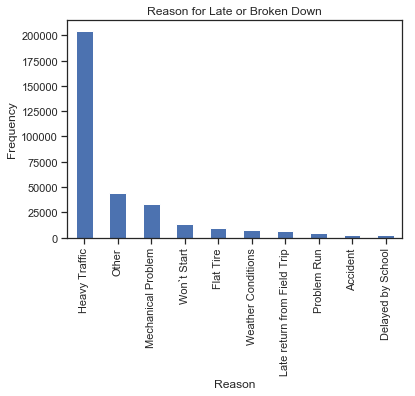

In [277]:
df.Reason.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Reason')
plt.title('Reason for Late or Broken Down')

In [278]:
df_breakdown = df[df['Breakdown_or_Running_Late'] == 'Breakdown']

In [279]:
df_RunningLate = df[df['Breakdown_or_Running_Late'] == 'Running_Late']

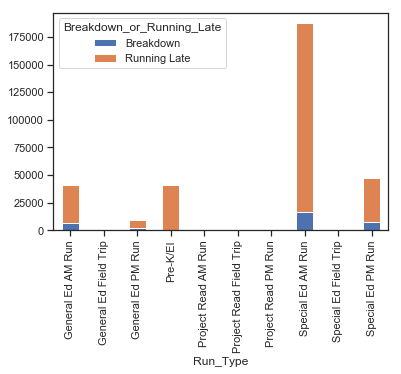

In [280]:
target_runtype = df.groupby(['Run_Type', 'Breakdown_or_Running_Late']).size()
target_runtype.unstack().plot(kind='bar', stacked=True, grid=False)

#show it with time 

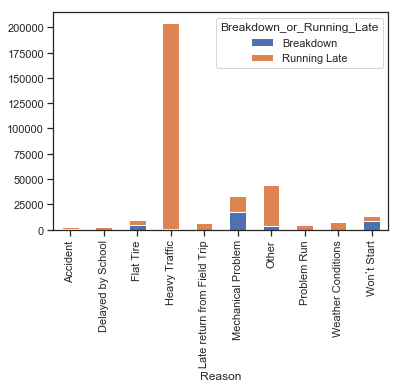

In [281]:
target_runtype = df.groupby(['Reason', 'Breakdown_or_Running_Late']).size()
target_runtype.unstack().plot(kind='bar', stacked=True, grid=False)

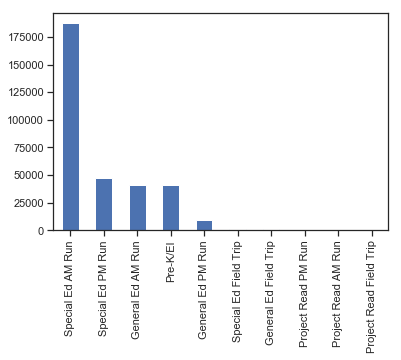

In [282]:
df.Run_Type.value_counts().plot(kind='bar')

In [283]:
len(df['day'].unique())

860

In [284]:
df = df.drop('Busbreakdown_ID',axis=1)

In [285]:
df = df.drop('Occurred_On', axis=1)

In [286]:
df = df.drop('datetime_text', axis=1)

In [287]:
df = df.drop('Bus_Company_Name',axis=1)

In [288]:
df = df.drop('School_Year',axis=1)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 19 columns):
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
Created_On                         328235 non-null object
Boro                               317077 non-null object
bus company name normalized        328235 non-null object
Number_Of_Students_On_The_Bus      328235 non-null int64
Has_Contractor_Notified_Schools    328235 non-null object
Has_Contractor_Notified_Parents    328235 non-null object
Have_You_Alerted_OPT               328235 non-null object
Informed_On          

In [290]:
df['bus company name normalized'].value_counts().head(5)

#top 5 companies 

LEESEL TRANSP CORP (B2192    51281
RELIANT TRANS, INC.          30967
G.V.C., LTD.                 27313
PIONEER TRANSPORTATION CO    26290
NEW DAWN TRANSIT, LLC (B2    16542
Name: bus company name normalized, dtype: int64

In [291]:
df_breakdown['bus company name normalized'].value_counts().head()

LITTLE RICHIE BUS SERVICE    5944
LOGAN BUS COMPANY INC.       3470
RELIANT TRANS, INC.          3245
LITTLE LISA BUS CO. INC.     2311
LORINDA ENT. LTD.            2066
Name: bus company name normalized, dtype: int64

In [292]:
df_runlate['bus company name normalized'].value_counts().head()

LEESEL TRANSP CORP (B2192    50759
RELIANT TRANS, INC.          27722
G.V.C., LTD.                 26566
PIONEER TRANSPORTATION CO    26270
NEW DAWN TRANSIT, LLC (B2    15593
Name: bus company name normalized, dtype: int64

In [293]:
df = df.dropna()

In [294]:
'''
df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed'].str.replace('min','')
df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed'].str.replace('mins','')
df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed'].str.replace('MIN','')
df['How_Long_Delayed'].str.replace('S','')
'''

"\ndf['How_Long_Delayed'].str.replace('minutes','')\ndf['How_Long_Delayed'].str.replace('MINS','')\ndf['How_Long_Delayed'].str.replace('min','')\ndf['How_Long_Delayed'].str.replace('minutes','')\ndf['How_Long_Delayed'].str.replace('mins','')\ndf['How_Long_Delayed'].str.replace('MINS','')\ndf['How_Long_Delayed'].str.replace('MIN','')\ndf['How_Long_Delayed'].str.replace('S','')\n"

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317057 entries, 0 to 328234
Data columns (total 19 columns):
Run_Type                           317057 non-null object
Bus_No                             317057 non-null object
Route_Number                       317057 non-null object
Reason                             317057 non-null object
Schools_Serviced                   317057 non-null object
day                                317057 non-null object
time                               317057 non-null object
hour of issue                      317057 non-null int64
Created_On                         317057 non-null object
Boro                               317057 non-null object
bus company name normalized        317057 non-null object
Number_Of_Students_On_The_Bus      317057 non-null int64
Has_Contractor_Notified_Schools    317057 non-null object
Has_Contractor_Notified_Parents    317057 non-null object
Have_You_Alerted_OPT               317057 non-null object
Informed_On          

In [296]:
df.Run_Type.value_counts()

Special Ed AM Run          177375
Special Ed PM Run           45852
General Ed AM Run           40852
Pre-K/EI                    40626
General Ed PM Run            9448
General Ed Field Trip        1083
Special Ed Field Trip        1054
Project Read PM Run           631
Project Read AM Run           132
Project Read Field Trip         4
Name: Run_Type, dtype: int64

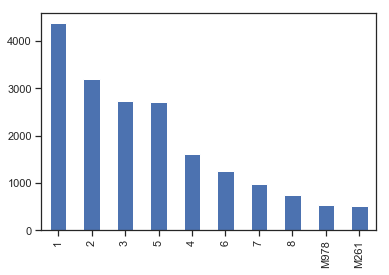

In [297]:
df.Route_Number.value_counts().head(10).plot(kind='bar')

In [298]:
df = df.drop('Schools_Serviced',axis=1)

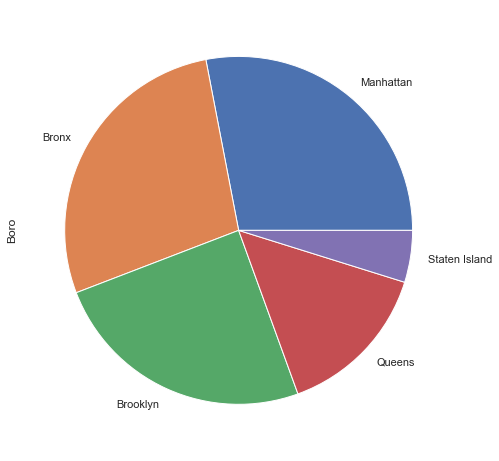

In [299]:
plt.figure(figsize=(15,8))
df.Boro.value_counts().head().plot(kind='pie')


In [300]:
df = df.drop('day',axis=1)
df = df.drop('time',axis=1)
df = df.drop('Created_On',axis=1)

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317057 entries, 0 to 328234
Data columns (total 15 columns):
Run_Type                           317057 non-null object
Bus_No                             317057 non-null object
Route_Number                       317057 non-null object
Reason                             317057 non-null object
hour of issue                      317057 non-null int64
Boro                               317057 non-null object
bus company name normalized        317057 non-null object
Number_Of_Students_On_The_Bus      317057 non-null int64
Has_Contractor_Notified_Schools    317057 non-null object
Has_Contractor_Notified_Parents    317057 non-null object
Have_You_Alerted_OPT               317057 non-null object
Informed_On                        317057 non-null object
Last_Updated_On                    317057 non-null object
Breakdown_or_Running_Late          317057 non-null object
School_Age_or_PreK                 317057 non-null object
dtypes: int64(2), obj

In [302]:
'''
df['How_Long_Delayed']= df['How_Long_Delayed'].str.replace('1hr','60')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('min','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('mins','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MIN','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('S','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('-45 Min','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('-30 Min','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('min','')
df['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('utes','')
df['How_Long_Delayed'].value_counts()
'''

"\ndf['How_Long_Delayed']= df['How_Long_Delayed'].str.replace('1hr','60')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('min','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('mins','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MIN','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('S','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('-45 Min','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('-30 Min','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('minutes','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('MINS','')\ndf['How_Long_Delayed']=df['How_Long_Delayed'].str.replace('min','')\ndf['Ho

In [303]:
df['How_Long_Delayed'].value_counts()

KeyError: 'How_Long_Delayed'

In [304]:
df = df.drop('Informed_On',axis=1)

In [305]:
df = df.drop('Last_Updated_On',axis=1)

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317057 entries, 0 to 328234
Data columns (total 13 columns):
Run_Type                           317057 non-null object
Bus_No                             317057 non-null object
Route_Number                       317057 non-null object
Reason                             317057 non-null object
hour of issue                      317057 non-null int64
Boro                               317057 non-null object
bus company name normalized        317057 non-null object
Number_Of_Students_On_The_Bus      317057 non-null int64
Has_Contractor_Notified_Schools    317057 non-null object
Has_Contractor_Notified_Parents    317057 non-null object
Have_You_Alerted_OPT               317057 non-null object
Breakdown_or_Running_Late          317057 non-null object
School_Age_or_PreK                 317057 non-null object
dtypes: int64(2), object(11)
memory usage: 33.9+ MB


In [307]:
from sklearn.preprocessing import LabelEncoder

#Auto encodes any dataframe column of type category or object.
def dummyEncode(df):
        columnsToEncode = list(df.select_dtypes(include=['category','object']))
        le = LabelEncoder()
        for feature in columnsToEncode:
            try:
                df[feature] = le.fit_transform(df[feature])
            except:
                print('Error encoding '+feature)
        return df

In [308]:
dummyEncode(df)

,Run_Type,Bus_No,Route_Number,Reason,hour of issue,Boro,bus company name normalized,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Breakdown_or_Running_Late,School_Age_or_PreK
0,7,6462,6408,6,6,5,12,0,1,0,0,1,1
1,7,3704,4107,5,6,2,50,0,1,1,1,0,1
2,7,3329,1864,6,6,2,42,0,1,1,0,1,1
3,7,2680,2186,6,6,2,18,1,1,1,0,1,1
4,7,6448,6437,5,6,5,12,0,1,1,0,1,1
5,7,394,10925,5,7,10,37,0,1,1,0,0,1
6,7,923,4350,3,7,4,50,0,1,1,1,1,1
7,7,8908,2876,7,7,2,13,9,1,0,0,1,1
8,7,5729,2989,6,7,2,12,0,1,1,0,1,1
9,7,2775,5691,3,7,4,30,2,1,1,1,1,1


In [309]:
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report


In [310]:
X = df.columns.values.tolist()
X.remove('Breakdown_or_Running_Late')
y = 'Breakdown_or_Running_Late'

In [311]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df[X],df[y],test_size=0.2,random_state=0)

In [312]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(253645, 12)
(63412, 12)
(253645,)
(63412,)


In [313]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train,y_train)

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [314]:
y_pred = logreg.predict(X_test)


In [315]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 4953  1847]
 [13637 42975]]


In [316]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.27      0.73      0.39      6800
           1       0.96      0.76      0.85     56612

   micro avg       0.76      0.76      0.76     63412
   macro avg       0.61      0.74      0.62     63412
weighted avg       0.88      0.76      0.80     63412



In [318]:
df['Breakdown_or_Running_Late'].value_counts()

1    283002
0     34055
Name: Breakdown_or_Running_Late, dtype: int64

In [317]:
bagging = BaggingClassifier(n_estimators=50)
bagging.fit(X_train,y_train)
y_pred_bag = bagging.predict(X_test)
print('Accuracy of Bagging classifier on test set: {:.2f}'.format(bagging.score(X_test, y_test)))

Accuracy of Bagging classifier on test set: 0.95


In [321]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      6800
           1       0.97      0.98      0.97     56612

   micro avg       0.95      0.95      0.95     63412
   macro avg       0.88      0.87      0.88     63412
weighted avg       0.95      0.95      0.95     63412



Accuracy of Random Forest classifier on test set: 0.95
[[ 5127  1673]
 [ 1238 55374]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      6800
           1       0.97      0.98      0.97     56612

   micro avg       0.95      0.95      0.95     63412
   macro avg       0.89      0.87      0.88     63412
weighted avg       0.95      0.95      0.95     63412



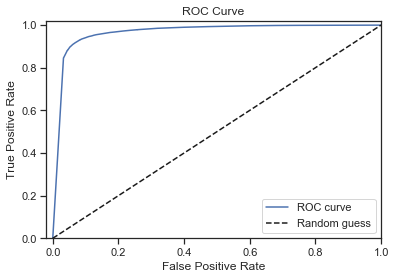

In [325]:
RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_train,y_train)
y_pred_rf = RF.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(bagging.score(X_test, y_test)))

###### Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rf)
print(confusion_matrix)

###### Classification Report

print(classification_report(y_test, y_pred_rf))

###### ROC Curve

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

y_pred_prob = bagging.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")



In [328]:
y_test

218320    1
19377     1
241560    0
168670    1
8287      1
298205    1
303308    0
231619    1
115865    1
220465    1
219342    1
15691     1
268393    1
183162    1
230012    1
286052    0
232320    1
220548    1
159749    1
327209    1
160868    1
232371    0
157710    1
48206     1
188660    1
12920     0
129522    1
216727    1
198372    1
295345    1
         ..
82610     0
65515     1
163707    1
32635     1
228923    1
4232      1
177966    1
131087    1
208354    1
320087    1
132590    1
172397    0
193350    1
38853     0
124837    1
207424    1
168349    1
84448     1
176142    1
50078     1
114936    1
315927    1
167286    1
37712     1
136407    1
294593    1
65664     1
145144    1
242113    1
317251    1
Name: Breakdown_or_Running_Late, Length: 63412, dtype: int64